# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import gmaps
import gmaps.datasets
from ipywidgets.embed import embed_minimal_html

# Import API key
from api_keys import api_key1
from api_keys import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls

In [ ]:
# # Save config information and build query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key1}&units={units}&q="

# set up lists to hold response data
city_names = []
countries = []
dates = []
latitudes = [] 
longitudes = []
max_temperatures = []
humidities = []
cloudinesses = []
wind_speeds = []

# Set up counters for a print log of each city as it's being processed
count_city = 1
count_set = 1

# Start the print log
print("Beginning Data Retrieval")
print("--------------------------------")

# Loop through all the cities in the list "cities", make requests and parse
for city in cities:
    response = requests.get(query_url + city).json()
    
    # Formula for percentage being processed
    percent=('{:.1f}%'.format((((count_set)-1)*49 + count_city)/(len(cities))*100))  
    print(f"{percent}   Processing Record {count_city} of Set {count_set} | {city}")
    
    # Append the values for each city 
    try:
        city_names.append(response['name'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        max_temperatures.append(response["main"]["temp_max"])
        humidities.append(response["main"]["humidity"])
        cloudinesses.append(response['clouds']["all"])
        wind_speeds.append(response["wind"]["speed"])
    
    # Keep running the code if a city is not found
    except KeyError:
            print(" City not found. Skipping...")
    
    # Adjust the counter
    if count_city < 49:
        count_city +=1 
    else:
        count_city = 1
        count_set +=1
    
    # Wait a second in loop to not over exceed 60 requests per minute   
    time.sleep(1)

print("---------------------------------")
print(f"Data Retrieval Complete: {len(city_names)} cities recorded")
print("---------------------------------")
   



### Convert Raw Data to DataFrame

In [ ]:
# Convert the data into a DataFrame
data_df = pd.DataFrame({
    "City": city_names, "Country": countries, "Latitude": latitudes, "Longitude": longitudes, 
    "Date - Time": dates, "Max Temp": max_temperatures, "Humidity": humidities,
    "Cloudiness": cloudinesses, "Wind Speed": wind_speeds})

# Check the number of values in each column
data_df.count()

In [ ]:
# Change the Unix, UTC format in Date to date and time format
data_df['Date - Time'] = pd.to_datetime(data_df['Date - Time'], unit='s')

In [ ]:
date_data = data_df['Date - Time'].iloc[0]
date_data = (pd.to_datetime(date_data)).date()
date_data1 = date_data.strftime("%m_%d_%Y")

date_data2 = date_data.strftime("%m/%d/%Y")

In [2]:
# Save the data to csv file
data_df.to_csv(f'../WebVisualizations/Resources/cities_{date_data1}.csv')

NameError: name 'data_df' is not defined

In [ ]:
# Display the DataFrame
data_df.head()

In [3]:
data_csv = pd.read_csv('../WebVisualizations/Resources/cities_10_01_2019.csv')
del data_csv['Unnamed: 0']

In [4]:
data_df = data_csv
data_df

,City,Country,Latitude,Longitude,Date - Time,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,-53.16,-70.91,2019-10-01 14:16:34,39.20,55,75,13.87
1,Hilo,US,19.71,-155.08,2019-10-01 14:18:25,75.20,73,75,5.82
2,Rikitea,PF,-23.12,-134.97,2019-10-01 14:16:28,67.90,83,75,17.87
3,Vaini,IN,15.34,74.49,2019-10-01 14:17:11,75.20,88,40,3.36
4,Souillac,FR,45.60,-0.60,2019-10-01 14:16:51,71.01,64,40,26.40
5,Romny,UA,50.74,33.49,2019-10-01 14:19:49,54.40,67,68,8.41
6,Hami,CN,42.84,93.51,2019-10-01 14:19:50,62.86,24,100,12.77
7,Ushuaia,AR,-54.81,-68.31,2019-10-01 14:12:17,35.60,80,90,23.04
8,Albany,US,42.65,-73.75,2019-10-01 14:13:14,62.01,87,90,14.99
9,Gat,SN,14.69,-16.54,2019-10-01 14:19:54,91.40,52,0,11.41


In [5]:
date_data = data_df['Date - Time'].iloc[0]
date_data = (pd.to_datetime(date_data)).date()
date_data1 = date_data.strftime("%m_%d_%Y")

date_data2 = date_data.strftime("%m/%d/%Y")

### Plotting the Data

#### Latitude vs. Max Temperature Plot

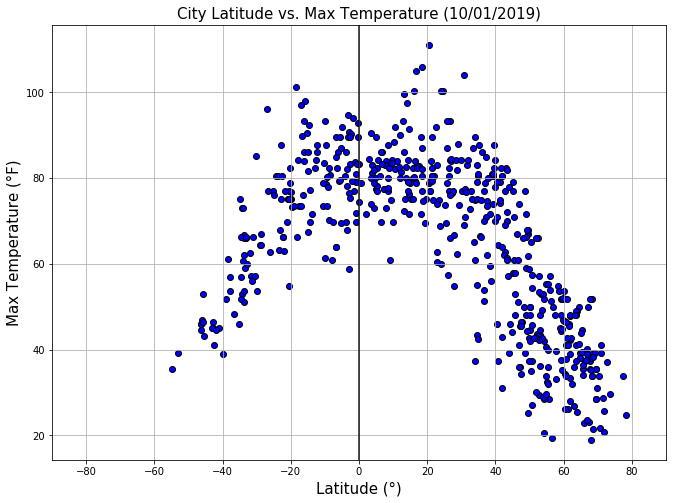

In [8]:
# Create a scatter plot based on the Dataframe data
plt.figure(figsize=(11,8))
plt.scatter(data_df["Latitude"], data_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black", alpha=1)
#plt.rcParams['figure.facecolor'] = '#17a2b8'

# Create a title, x label, and y label for our chart
plt.title(f"City Latitude vs. Max Temperature ({date_data2})", fontsize=15)
plt.xlabel("Latitude (°)", fontsize=15)
plt.ylabel("Max Temperature (°F)", fontsize=15)

# Set the upper and lower limits of x axis
plt.xlim(-90, 90)

# Add a vertical line at x = 0 and grid
plt.axvline(x=0, color = 'black', alpha=0.9)
plt.grid()

# Save and show the graph
plt.savefig(f"../WebVisualizations/Resources/assets/images/temperaturemap.png")
plt.show()

#### Latitude vs. Humidity Plot

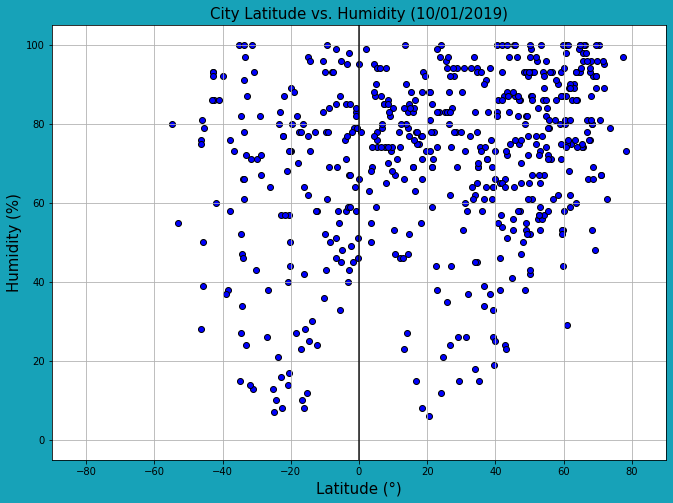

In [9]:
# Create a scatter plot based on the Dataframe data
plt.figure(figsize=(11,8), facecolor='#17a2b8')
plt.scatter(data_df["Latitude"], data_df["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=1)

# Create a title, x label, and y label for our chart
plt.title(f"City Latitude vs. Humidity ({date_data2})", fontsize=15)
plt.xlabel("Latitude (°)", fontsize=15)
plt.ylabel("Humidity (%)", fontsize=15)

# Set the upper and lower limits x and y axis
plt.xlim(-90, 90)
plt.ylim(-5, 105)

# Add a vertical line at x = 0 ang grid
plt.axvline(x=0, color = 'black', alpha=0.9)
plt.grid()

# Save and show the graph
plt.savefig(f"../WebVisualizations/Resources/assets/images/humiditymap.png")
plt.show()

#### Latitude vs. Cloudiness Plot

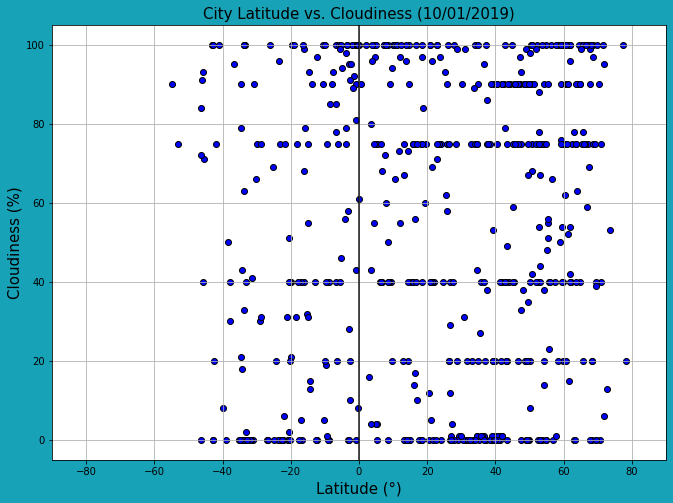

In [10]:
# Create a scatter plot based on the Dataframe data
plt.figure(figsize=(11,8), facecolor='#17a2b8')
plt.scatter(data_df["Latitude"], data_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=1)

# Create a title, x label, and y label for our chart
plt.title(f"City Latitude vs. Cloudiness ({date_data2})", fontsize=15)
plt.xlabel("Latitude (°)", fontsize=15)
plt.ylabel("Cloudiness (%)", fontsize=15)

# Set the upper and lower limits of x and y axis
plt.xlim(-90, 90)
plt.ylim(-5, 105)

# Add a vertical line at x = 0 and grid
plt.axvline(x=0, color = 'black', alpha=0.9)
plt.grid()

# Save and show the graph
plt.savefig(f"../WebVisualizations/Resources/assets/images/cloudymap.png")
plt.show()

#### Latitude vs. Wind Speed Plot

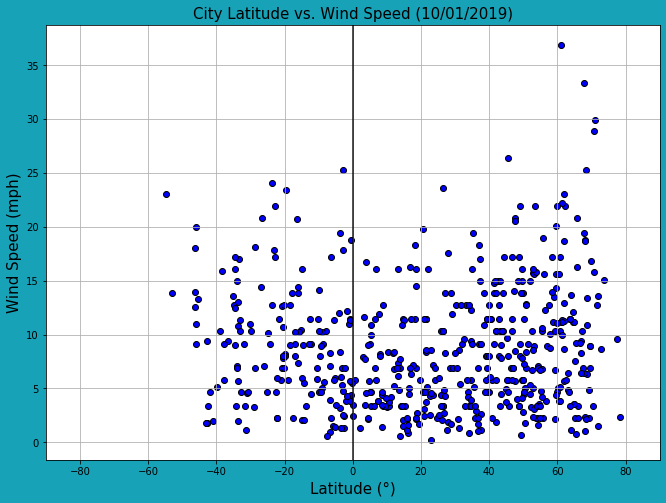

In [11]:
# Create a scatter plot based on the Dataframe data
plt.figure(figsize=(11,8), facecolor='#17a2b8')
# Store latitude and longitude in locations
plt.scatter(data_df["Latitude"], data_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha=1)

# Create a title, x label, and y label for our chart
plt.title(f"City Latitude vs. Wind Speed ({date_data2})", fontsize=15)
plt.xlabel("Latitude (°)", fontsize=15)
plt.ylabel("Wind Speed (mph)", fontsize=15)

# Set the upper and lower limits of x axis
plt.xlim(-90, 90)

# Add a vertical line at x = 0 and grid
plt.axvline(x=0, color = 'black', alpha=0.9)
plt.grid()

# Save and show the graph
plt.savefig(f"../WebVisualizations/Resources/assets/images/windmap.png")
plt.show()

In [14]:
# Store latitude and longitude in locations
locations = data_df[["Latitude", "Longitude"]]

In [15]:
figure_layout = {
    'width': '800px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout, center=(30.0, 0.0), zoom_level=1.5)


In [16]:
# Assign the cities layer to a variable
cities_layer = gmaps.symbol_layer(
    locations, fill_color='blue', stroke_color='blue', scale=1
)

# Add the layer to the map
fig.add_layer(cities_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

In [10]:
#gmaps.figure()
#embed_minimal_html('export.html', views=[fig])